In [65]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#df1 = pd.read_csv("MAERSK_Annular_2017_02_26_to_2017_06_19.csv", sep = '\t')

In [45]:
df1 = pd.read_csv("MAERSK_PressureTags_2017_06_19_to_2018_03_31.csv", sep='\t')

In [52]:
df1.dtypes

last_active_time                                   datetime64[ns]
activePod                                                   int64
rig_id                                                     object
Blue                                                        int64
Yellow                                                      int64
Active                                                      int64
BlueSem                                                     int64
YellowSem                                                   int64
LA Open Current                                             int64
LA Close SC                                                 int64
LA Close SFS                                                int64
LA Open SFS                                                 int64
LA Open SOC                                                 int64
LA Close SOC                                                int64
Blue Adj Ref                                                int64
Yellow Adj

In [53]:
df1['last_active_time'] = pd.to_datetime(df1['last_active_time'])

In [54]:
df1.head()

,last_active_time,activePod,rig_id,Blue,Yellow,Active,BlueSem,YellowSem,LA Open Current,LA Close SC,...,YellowFlowIndx,Pod1 Total1,Pod1 Total2,Pod2 Total1,Pod2 Total2,user_entered_reference_pres_podtrans_pod_1_sema,user_entered_reference_pres_podtrans,user_entered_reference_pres_podtrans_pod_2_sema,pod_2_adj,pod_1_adj
0,2017-06-19 18:15:49,1,MAERSK_DISC,1,3,1,2,4,236,0,...,18,20.889999,695.179993,0.0,0.0,-3000,-3000,-1500,904.390015,793.150024
1,2017-06-19 18:15:51,1,MAERSK_DISC,1,3,1,2,4,236,0,...,18,20.889999,695.179993,0.0,0.0,-3000,-3000,-1500,904.390015,793.150024
2,2017-06-19 18:15:53,1,MAERSK_DISC,1,3,1,2,4,236,0,...,18,20.889999,695.179993,0.0,0.0,-3000,-3000,-1500,904.390015,793.150024
3,2017-06-19 18:15:55,1,MAERSK_DISC,1,3,1,2,4,236,0,...,18,20.889999,695.179993,0.0,0.0,-3000,-3000,-1500,904.390015,793.150024
4,2017-06-19 18:15:56,1,MAERSK_DISC,1,3,1,2,4,236,0,...,18,20.889999,695.179993,0.0,0.0,-3000,-3000,-1500,904.390015,793.150024


In [41]:
list(df1.columns.values)

['last_active_time',
 'activePod',
 'rig_id',
 'Blue',
 'Yellow',
 'Active',
 'BlueSem',
 'YellowSem',
 'LA Open Current',
 'LA Close SC',
 'LA Close SFS',
 'LA Open SFS',
 'LA Open SOC',
 'LA Close SOC',
 'Blue Adj Ref',
 'Yellow Adj Ref',
 'BLUE ADJ',
 'YELLOW ADJ',
 'LA RegRdbakPes 1/A',
 'LA RegRdbakPes 1/B',
 'LA RegRdbakPes 2/A',
 'LA RegRdbakPes 2/B',
 'LA RegRdbakPes',
 'LA RegPilotPes',
 'UA RegPilotPes',
 'UA RegRdbakPes',
 'pod_pilot_pres_podtrans',
 'pod_supply_pres_podtrans',
 'lower_ann_open_current',
 'lower_ann_close_current',
 'upper_ann_open_current',
 'upper_ann_close_current',
 'BlueFlowIndx',
 'YellowFlowIndx',
 'Pod1 Total1',
 'Pod1 Total2',
 'Pod2 Total1',
 'Pod2 Total2',
 'user_entered_reference_pres_podtrans_pod_1_sema',
 'user_entered_reference_pres_podtrans',
 'user_entered_reference_pres_podtrans_pod_2_sema',
 'pod_2_adj',
 'pod_1_adj']

In [42]:
df1['activePod'].describe()

count    3.097711e+06
mean     1.012823e+00
std      1.596296e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.000000e+00
Name: activePod, dtype: float64

In [ ]:
## Selected Columns:
# 'last_active_time','UA RegPilotPes', 'UA RegRdbakPes', 'pod_pilot_pres_podtrans', 'pod_supply_pres_podtrans',
# 'upper_ann_open_current', 'upper_ann_close_current', 'pod_2_adj', 'pod_1_adj'
# Additional parameters required to Adjust
## ['Active'],['pod_1_adj'],['pod_2_adj'], 

In [55]:
df1_temp = df1[['last_active_time','UA RegPilotPes', 'UA RegRdbakPes', 'pod_pilot_pres_podtrans', 'pod_supply_pres_podtrans',
                'upper_ann_open_current', 'upper_ann_close_current', 'pod_2_adj', 'pod_1_adj','Active']]

In [11]:
#df2.head()

In [89]:
temp = df1_temp.describe()

In [58]:
df1_temp.columns.values

array(['last_active_time', 'UA RegPilotPes', 'UA RegRdbakPes',
       'pod_pilot_pres_podtrans', 'pod_supply_pres_podtrans',
       'upper_ann_open_current', 'upper_ann_close_current', 'pod_2_adj',
       'pod_1_adj', 'Active'], dtype=object)

In [66]:
df1_temp['UA RegPilotPes_adj'] = np.where(df1_temp['Active'] == 1, df1_temp['UA RegPilotPes']- df1_temp['pod_1_adj'],df1_temp['UA RegPilotPes']- df1_temp['pod_2_adj']) 

C:\Users\1535980\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
df1_temp['UA RegRdbakPes_adj'] = np.where(df1_temp['Active'] == 1, df1_temp['UA RegRdbakPes']- df1_temp['pod_1_adj'],df1_temp['UA RegRdbakPes']- df1_temp['pod_2_adj']) 

C:\Users\1535980\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
df1_temp['pod_pilot_pres_podtrans_adj'] = np.where(df1_temp['Active'] == 1, df1_temp['pod_pilot_pres_podtrans']- df1_temp['pod_1_adj'],df1_temp['pod_pilot_pres_podtrans']- df1_temp['pod_2_adj']) 

C:\Users\1535980\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
df1_temp['pod_supply_pres_podtrans_adj'] = np.where(df1_temp['Active'] == 1, df1_temp['pod_supply_pres_podtrans']- df1_temp['pod_1_adj'],df1_temp['pod_supply_pres_podtrans']- df1_temp['pod_2_adj']) 

C:\Users\1535980\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
df1_temp.describe()

,UA RegPilotPes,UA RegRdbakPes,pod_pilot_pres_podtrans,pod_supply_pres_podtrans,upper_ann_open_current,upper_ann_close_current,pod_2_adj,pod_1_adj,Active,UA RegPilotPes_adj,UA RegRdbakPes_adj,pod_pilot_pres_podtrans_adj,pod_supply_pres_podtrans_adj
count,3.097711e+06,3.097711e+06,3.097711e+06,3.097711e+06,3.097711e+06,3.097711e+06,3.097711e+06,3.097711e+06,3.097711e+06,3.097711e+06,3.097711e+06,3.097711e+06,3.097711e+06
mean,1.848166e+03,5.995954e+02,1.846537e+03,1.695274e+03,2.060387e+02,1.750518e+00,3.138643e+02,3.038281e+02,1.012823e+00,1.544362e+03,2.957921e+02,1.542734e+03,1.391471e+03
std,2.253103e+02,7.996694e+02,1.897899e+03,1.743451e+03,6.173528e+01,2.013642e+01,3.888888e+02,3.756505e+02,1.596296e-01,2.343986e+02,5.655847e+02,1.565489e+03,1.417723e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-9.901999e+01,-5.689999e+00,-3.378000e+01
25%,1.713710e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.406310e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.713710e+03,0.000000e+00,2.809000e+01,1.752000e+01,2.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.713710e+03,0.000000e+00,2.107000e+01,1.752000e+01
75%,1.939190e+03,8.733300e+02,3.990250e+03,3.573090e+03,2.310000e+02,0.000000e+00,8.033400e+02,7.614200e+02,1.000000e+00,1.713710e+03,3.029999e+01,3.174670e+03,2.807660e+03
max,2.847590e+03,2.724870e+03,4.512530e+03,4.501160e+03,3.270000e+02,3.360000e+02,9.061700e+02,9.581200e+02,3.000000e+00,2.086170e+03,1.963450e+03,3.751110e+03,3.739740e+03


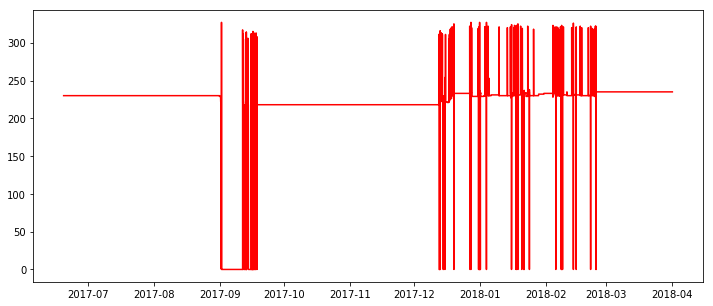

In [85]:
plt.figure(figsize=(12,5))
plt.plot(df1_temp['last_active_time'], df1_temp.upper_ann_open_current, color = 'red')

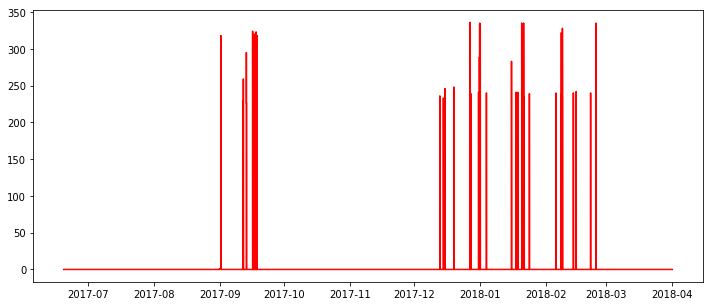

In [86]:
plt.figure(figsize=(12,5))
plt.plot(df1_temp['last_active_time'],df1_temp.upper_ann_close_current, color = 'red')

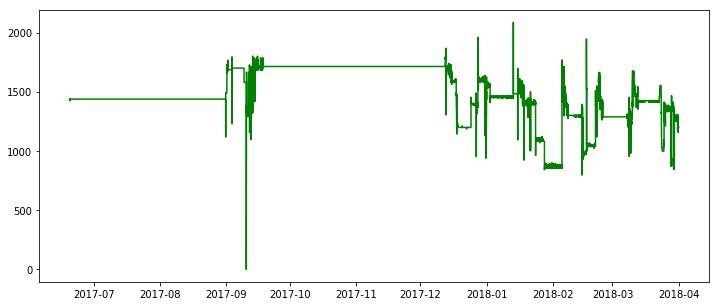

In [87]:
plt.figure(figsize=(12,5))
plt.plot(df1_temp['last_active_time'], df1_temp['UA RegPilotPes_adj'], color = 'green')

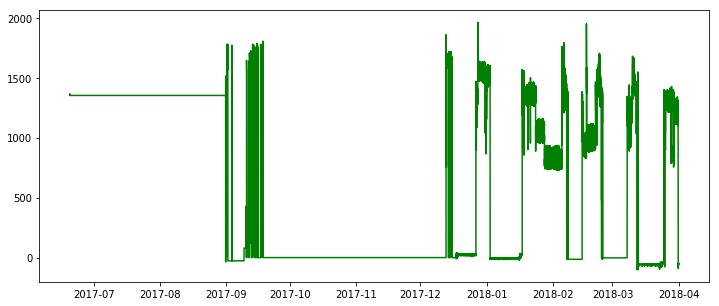

In [88]:
plt.figure(figsize=(12,5))
plt.plot(df1_temp['last_active_time'], df1_temp['UA RegRdbakPes_adj'], color = 'green')

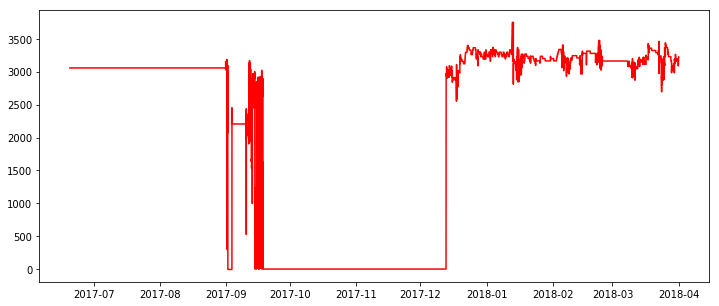

In [82]:
plt.figure(figsize=(12,5))
plt.plot(df1_temp['last_active_time'], df1_temp['pod_pilot_pres_podtrans_adj'], color = 'red')

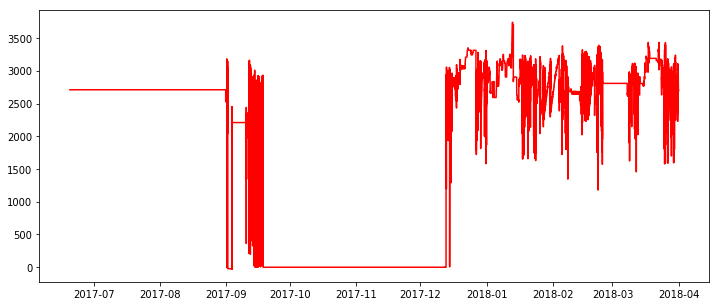

In [81]:
plt.figure(figsize=(12,5))
plt.plot(df1_temp['last_active_time'], df1_temp['pod_supply_pres_podtrans_adj'], color = 'red')

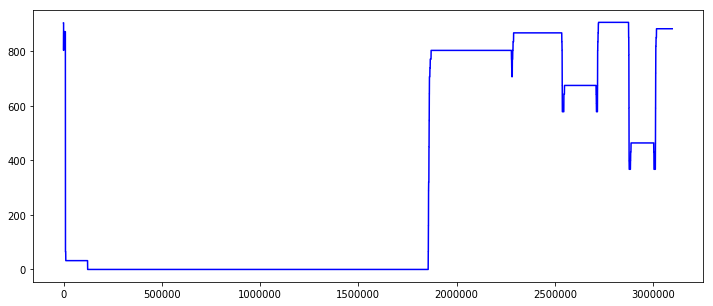

In [79]:
plt.figure(figsize=(12,5))
plt.plot(df1[['pod_2_adj']], color = 'blue')

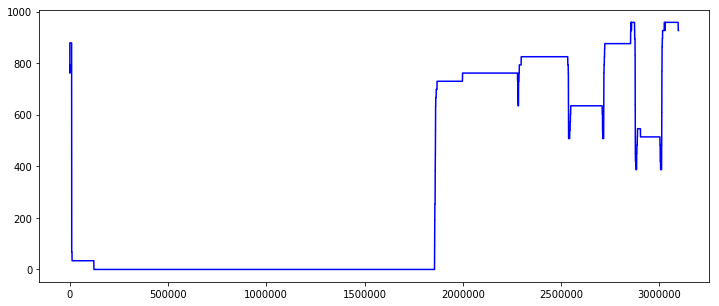

In [35]:
plt.figure(figsize=(12,5))
plt.plot(df1[['pod_1_adj']], color = 'blue')

In [24]:
#Write both MAERSK fiels in a xls file for Tableau and reuse
df2_temp.to_excel("MAERSK_Annular_2017_06_19_to_2018_03_31_v1.xlsx", sheet_name='Sheet_name_1')

NameError: name 'df2_temp' is not defined